# Lecture 6: RDKit (part 1)

## RDKit Mol Objects

In RDKit, molecules are represented using `Mol objects` (short for "Molecule objects", we built our own version in Lecture 4). These objects serve as the fundamental data structure for handling molecules, allowing users to store, manipulate, and analyze chemical data efficiently. Mol objects can be created from various molecular representations, including the SMILES (see below), or .mol files (which contain coordinate and bond information). 

Once we have a `Mol object`, we can use it to get certain properties, to generate feasible 3D structures, or even to represent the molecule for machine learning applications. 

## Reading and writing 

There are many ways to represent chemical structures. As chemists, we are familiar with IUPAC names and line drawings. As cheminformaticists, we need representations that work with computers. The most common text-based representation is SMILES (Simplified Molecular Input Line Entry System). Others include a variant on SMILES called SELFIES (Self-Referencing Embedded Strings), and InChi (International Chemical Identifier), and you can read more about them if interested. 

Let's make our first molecule from smiles.

In [49]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

ethanol = Chem.MolFromSmiles("CCO") # Ethanol

In [50]:
# We can see that this is a Mol object
print(ethanol)

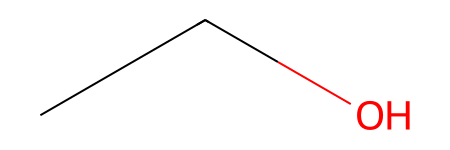

In [51]:
# The mol object automatically returns an image 
ethanol

### **SMILES Crash Course**  

SMILES is a system to represent molecular connectivity with text. 

#### **Basic SMILES Rules**  

- **Atoms** are represented by their elemental symbols (e.g., `C` for carbon, `O` for oxygen).  
- **Bonds** are typically assumed to be single unless specified otherwise:  
  - Double bonds: `=` (e.g., `C=C` for ethene)  
  - Triple bonds: `#` (e.g., `C#C` for ethyne)  
  - Explicit single bonds: `-` (usually omitted unless necessary)  
- **Implicit Hydrogen Filling**: Any unfilled valency is assumed to be occupied by hydrogen.  
  - Example: `"C"` represents methane (`CH₄`), and `"O"` represents water (`H₂O`).  
  - Hydrogens **can** be made explicit, e.g. (`[nH]1cccc1`)
- **Branches** are enclosed in parentheses to indicate side groups.  
  - Example: `"CC(C)O"` represents isopropanol.  
- **Rings** are represented by breaking them at a single bond and using matching numbers to indicate connectivity.  
  - Example: `"C1CCCCC1"` represents cyclohexane.  
- **Aromaticity** can be represented explicitly (`C1=CC=CC=C1` for benzene) or using lowercase letters (`c1ccccc1`).  



#### **Additional Resources**  

For a more detailed introduction, check out these resources:  

- **Beginner-Friendly SMILES Tutorial**: [ChemicBook Guide](https://chemicbook.com/2021/02/13/smiles-strings-explained-for-beginners-part-1.html)  
- **Official Daylight SMILES Documentation**: [Daylight Theory](https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html)  


## **Practice with SMILES**

Experiment with smiles notation. Can you write the smiles for 1-butanol? Tert-butanol? As a challenge, write the smiles for vanillin. 

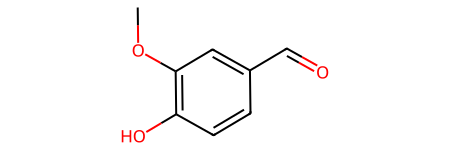

In [ ]:
butanol = # your smiles here
tertbutanol = # your smiles here
vanillin = # your smiles here

Chem.MolFromSmiles(vanillin)

### **Multiple SMILES Representations for the Same Molecule**  

A single molecule can have multiple valid **SMILES representations** due to the flexibility in how atoms and bonds are ordered. This occurs because SMILES is a **linear notation** derived from the molecular graph, which can be traversed in different ways.  

#### **Examples of Multiple SMILES for the Same Molecule**  

Consider **ethanol (`C₂H₅OH`)**:  

- `"CCO"` – A common way to write ethanol.  
- `"C(O)C"` – The same molecule, but written with the oxygen first.  

For **benzene (`C₆H₆`)**:  

- `"C1=CC=CC=C1"` – Explicitly showing alternating double bonds.  
- `"c1ccccc1"` – Using lowercase notation to denote aromaticity.  

For **butane (`C₄H₁₀`)**:  

- `"CCCC"` – Writing it in a straight-chain order.  
- `"CCC(C)"` – Choosing a different path to traverse the structure.  

#### **Canonical SMILES: A Unique Representation**  

To address this variability, RDKit and other cheminformatics tools can generate a **canonical SMILES**, which provides a unique representation of a molecule. This ensures that structurally identical molecules have the same SMILES. **Be awarer** that different softwares use different canonicalization algorithms. 

Given a list of three different smiles, convert each to a molecule using `Chem.MolFromSmiles()`, then convert back to smiles using `Chem.MolToSmiles()`. Count how many unique smiles there are. What does this indicate about the `Chem.MolToSmiles()` function? 

In [ ]:
smiles_list = ["CC(=O)OC1=CC=CC=C1C(=O)O", "c1c(OC(=O)C)c(C(=O)O)ccc1", "CC(=O)Oc1ccccc1C(=O)O"] 

# Convert mol from smiles, then mol to smiles

# Count unique smiles
print("Number of unique canonical smiles:")
# Fill in here

Number of unique canonical smiles:  1


<details> <summary>What does this indicate about `Chem.MolToSmiles()`?</summary>
The number of unique SMILES in the output is 1, even though we started with three different SMILES representations.

This indicates that Chem.MolToSmiles() generates a canonical SMILES.

</details>

Write a function called `canonicalize_smiles`. As input, it should take one or multiple smiles, and should output the canonical smiles. 

In [ ]:
def canonicalize_smiles(smiles: str) -> str:
    # Your code here

Thus far, we've only made molecules out of valid smiles. What happens when we put in a nonsense smiles, like "c1ccccc" which is missing the second number to indicate a ring closure. 

In [55]:
invalid_smiles = "c1ccccc" 
mol = Chem.MolFromSmiles(invalid_smiles)
print(mol)

None


[11:32:24] SMILES Parse Error: unclosed ring for input: 'c1ccccc'


Some SMILES that follow all the grammatical rules may violate chemical rules. For example, take `"C(C)(C)(C)(C)(C)"` which has a pentavalent carbon.

In [56]:
chemically_invalid = "C(C)(C)(C)(C)(C)"
mol = Chem.MolFromSmiles(chemically_invalid)
print(mol)

None


[11:32:24] Explicit valence for atom # 0 C, 5, is greater than permitted


When RDKit is given an invalid smiles, it will print an error message and return `None`. instead of something like `<rdkit.Chem.rdchem.Mol object at 0x127c8bbc0>`. 

In [57]:
mol is None

True

We can choose to opt out of rdkit's chemical validity checks by using `sanitize = False`. This is normally not necessary, and should only be done with caution. 

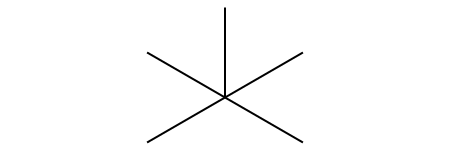

In [58]:
chemically_invalid = "C(C)(C)(C)(C)(C)"
mol = Chem.MolFromSmiles(chemically_invalid, sanitize = False)
print(mol)
mol

When handling many molecules at once, we should keep this in mind and do some error handling. Rewrite the `canonicalize_smiles` function to handle invalid smiles. 

In [ ]:
def canonicalize_smiles(smiles: str) -> str:
    # Your code here

Test your function on the following smiles:
1. 123
2. "CO(C)(C)(C)"
3. "CCO"
4. "OCC"

Does it behave as expected?

In [63]:
# Example
canonicalize_smiles("CO(C)(C)(C)")

[11:32:48] Explicit valence for atom # 1 O, 4, is greater than permitted


ValueError: Could not convert smiles to mol

## **Other textual representations**

We can use similar syntax to convert a `Mol object` to and from other textual representations, like Inchi and InchiKey. 

InChI:  InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)
InChI Key:  BSYNRYMUTXBXSQ-UHFFFAOYSA-N


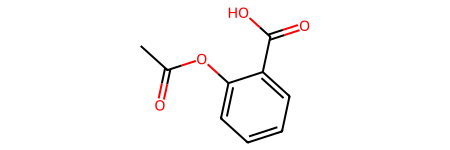

In [64]:
aspirin_smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
aspirin = Chem.MolFromSmiles(aspirin_smiles)
print("InChI: ", Chem.MolToInchi(aspirin))
print("InChI Key: ", Chem.InchiToInchiKey(Chem.MolToInchi(aspirin)))

aspirin_inchi = "InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)"
aspirin = Chem.MolFromInchi(aspirin_inchi)
aspirin

### **Structural Data Formats: Beyond SMILES and InChI**  

Text-based representations like **SMILES** and **InChI** are useful for encoding molecular structures in a compact form. However, they lack **3D information**, which is essential for many areas of chemistry, such as drug design and molecular modeling.  

To address this, other formats like **SDF (Structure Data File)** and **MOL files** have been developed. These formats store:  
- **Atomic coordinates** (3D positions of atoms)  
- **Connectivity information** (bonds between atoms) (optional) 

RDKit provides tools to work with these formats, allowing users to read, write, and manipulate **3D molecular structures**.  

For more details on structural data files, refer to:  
🔗 [Structural Data Files Overview](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/02%3A_Representing_Small_Molecules_on_Computers/2.05%3A_Structural_Data_Files)  

**Note:** RDKit can also handle files containing only atomic coordinates (e.g., `.xyz` files) without bond information. However, working with these files introduces some additional challenges.  

**3D structures from SMILES**
One of RDKit's powerful features is its ability to generate reasonable 3D coordinates from SMILES using the **ETKDG method**. This method can be used to create not just a single 3D structure, but an entire **ensemble of 3D conformers**. For more details, refer to the "Working with 3D molecules" section of the [RDKit Getting Started Guide](https://www.rdkit.org/docs/GettingStartedInPython.html).

In this section, we'll show you how to read, write, and generate 3D coordinates for `Mol Objects`. 

In [65]:
aspirin_2d = Chem.MolToMolBlock(aspirin)
print("SDF format: ", aspirin_2d)

SDF format:  
     RDKit          2D

 13 13  0  0  0  0  0  0  0  0999 V2000
   -5.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000   -2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    3.8971    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  6  1  0

We can see above that the z-coordinate for all atoms is zero. To generate a structure, we need to use the `AllChem` module's `EmbedMolecule` function. 

In [ ]:
from rdkit.Chem import AllChem

aspirin_3d = Chem.AddHs(aspirin) # Must add Hs first!
AllChem.EmbedMolecule(aspirin_3d)
print(Chem.MolToMolBlock(aspirin_3d))


     RDKit          3D

 21 21  0  0  0  0  0  0  0  0999 V2000
    3.4398   -0.7718   -0.3477 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5922    1.5422    0.0452 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7130    2.1047   -0.8579 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2383    0.3393    0.6101 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5162    1.4970   -1.1950 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1261   -0.1134   -0.1378 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0466   -0.2732    0.2791 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1743    0.2960   -0.6241 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6835   -1.5606    0.8931 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0117    0.7248    0.7770 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.3957   -2.1379    0.6079 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5137   -2.1898    1.8095 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.0047   -0.3777   -0.9075 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.5577   -1.0023   -1

### **Reading and writing from structural files**

In [67]:
# Write to a mol file
Chem.MolToMolFile(aspirin_3d, "aspirin.mol")

In [68]:
# Alternative write
with open("aspirin.mol", "w") as file:
    file.write(Chem.MolToMolBlock(aspirin_3d))

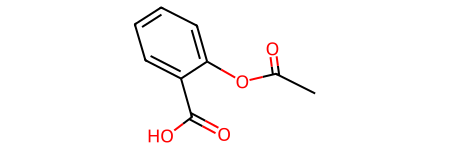

In [69]:
# Read from a mol file 
Chem.MolFromMolFile("aspirin.mol")

In [70]:
# Alternative read
with open("aspirin.mol", "r") as file:
     mol_block = file.read()
     aspirin_mol = Chem.MolFromMolBlock(mol_block)

Rdkit's 3D rendering abilitiy leaves something to be desired. To better understand the 3D structure of our molecule, we can use a convenient library called py3Dmol. 

In [ ]:
import py3Dmol

# Helpful function from a blog (https://rdkit.blogspot.com/2016/07/a-recent-post-on-in-pipeline-talked.html)
def drawit(m,p=None,confId=-1):
        mb = Chem.MolToMolBlock(m,confId=confId) # Returns SDF file as a string
        if p is None:
            p = py3Dmol.view(width=400,height=400)
        p.removeAllModels()
        p.addModel(mb,'sdf') 
        p.setStyle({'stick':{}})
        p.setBackgroundColor('white')
        p.zoomTo()
        return p.show()

drawit(aspirin_3d)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### **Working with RDKit Mol Objects**

We have learned how to create a `Mol Object`. Just like a molecule is composed of atoms and bonds, a `Mol Object` is composed of `Atom Objects` and `Bond Objects`. 

We can access some general information about atoms and bonds from the `Mol Object`, or we can get the atoms and bonds as an **iterable** meaning we can get information about individual atoms and bonds using loops.

Each atom and bond contains important information, such as:
- The **atom symbol** (e.g., "C" for carbon, "O" for oxygen)
- The **atomic number** (which tells us which element the atom belongs to)
- The **atom index** (a unique number for each atom in the molecule)

and more...

Let’s see how to access these details for each atom in a molecule like **Tylenol (acetaminophen)** using RDKit:

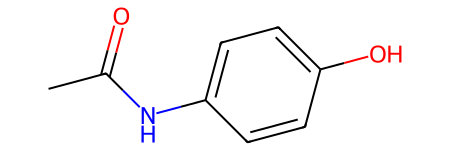

In [72]:
tylenol_smiles = "CC(=O)NC1=CC=C(C=C1)O"
tylenol = Chem.MolFromSmiles(tylenol_smiles)
tylenol 

How many atoms are there in tylenol? Bonds? 

In [73]:
print("Number of atoms: ", tylenol.GetNumAtoms())
print("Number of bonds: ", tylenol.GetNumBonds())

Number of atoms:  11
Number of bonds:  11


You might be surprised to notice that rdkit only counts the number of heavy atoms (not H). 


In [119]:
print("Number of atoms: ", tylenol.GetNumHeavyAtoms())
print("Number of bonds: ", tylenol.GetNumBonds(onlyHeavy = False))

Number of atoms:  11
Number of bonds:  20


To get the atom or bond objects from an rdkit mol object, we can use the `mol.GetAtoms()` or `mol.GetBonds()` methods. 

In [120]:
print(tylenol.GetAtoms())
print(tylenol.GetBonds())

These yield iterators. We can access individual atoms using with for loops. Each atom and bond holds a lot of information. Taking inspiration from the lecture, print the symbol, atomic number, index, degree, valence, and hybridization of each atomn in tylenol. 

In [ ]:
for atom in tylenol.GetAtoms():
    print(f"Atom: {atom.GetSymbol()}")
    print(f"Atomic Number: {atom.GetAtomicNum()}")
    print(f"Atom Index: {atom.GetIdx()}")
    print(f"Degree (number of neighbors): {atom.GetDegree()}")
    print(f"Valence: {atom.GetTotalValence()}")
    print(f"Hybridization: {atom.GetHybridization()}")
    print("-----------------------------------------")

Atom: C
Atomic Number: 6
Atom Index: 0
Degree (number of neighbors): 1
Valence: 4
Hybridization: SP3
-----------------------------------------
Atom: C
Atomic Number: 6
Atom Index: 1
Degree (number of neighbors): 3
Valence: 4
Hybridization: SP2
-----------------------------------------
Atom: O
Atomic Number: 8
Atom Index: 2
Degree (number of neighbors): 1
Valence: 2
Hybridization: SP2
-----------------------------------------
Atom: N
Atomic Number: 7
Atom Index: 3
Degree (number of neighbors): 2
Valence: 3
Hybridization: SP2
-----------------------------------------
Atom: C
Atomic Number: 6
Atom Index: 4
Degree (number of neighbors): 3
Valence: 4
Hybridization: SP2
-----------------------------------------
Atom: C
Atomic Number: 6
Atom Index: 5
Degree (number of neighbors): 2
Valence: 4
Hybridization: SP2
-----------------------------------------
Atom: C
Atomic Number: 6
Atom Index: 6
Degree (number of neighbors): 2
Valence: 4
Hybridization: SP2
-----------------------------------------

Let's look at what kind of bond information we have. 

In [ ]:
tylenol.GetBonds()

for bond in tylenol.GetBonds():
    print(f"Bond: {bond.GetBondType()}")
    print(f"Bond Index: {bond.GetIdx()}")
    print(f"Atom 1: {bond.GetBeginAtomIdx()}")
    print(f"Atom 2: {bond.GetEndAtomIdx()}")
    print(f"Is Conjugated: {bond.GetIsConjugated()}")
    print(f"Is Aromatic: {bond.GetIsAromatic()}")
    print("-----------------------------------------")

Bond: SINGLE
Bond Index: 0
Atom 1: 0
Atom 2: 1
Is Conjugated: False
Is Aromatic: False
-----------------------------------------
Bond: DOUBLE
Bond Index: 1
Atom 1: 1
Atom 2: 2
Is Conjugated: True
Is Aromatic: False
-----------------------------------------
Bond: SINGLE
Bond Index: 2
Atom 1: 1
Atom 2: 3
Is Conjugated: True
Is Aromatic: False
-----------------------------------------
Bond: SINGLE
Bond Index: 3
Atom 1: 3
Atom 2: 4
Is Conjugated: True
Is Aromatic: False
-----------------------------------------
Bond: AROMATIC
Bond Index: 4
Atom 1: 4
Atom 2: 5
Is Conjugated: True
Is Aromatic: True
-----------------------------------------
Bond: AROMATIC
Bond Index: 5
Atom 1: 5
Atom 2: 6
Is Conjugated: True
Is Aromatic: True
-----------------------------------------
Bond: AROMATIC
Bond Index: 6
Atom 1: 6
Atom 2: 7
Is Conjugated: True
Is Aromatic: True
-----------------------------------------
Bond: AROMATIC
Bond Index: 7
Atom 1: 7
Atom 2: 8
Is Conjugated: True
Is Aromatic: True
-------------

Each atom keeps track of its neighbors. We can access both bonds and atoms by index. 

In [74]:
N = tylenol.GetAtomWithIdx(3)
print(f"Atom: {N.GetSymbol()}")

for neighbor in N.GetNeighbors():
    print(f"Neighbor: {neighbor.GetIdx()} {neighbor.GetSymbol()}")

Atom: N
Neighbor: 1 C
Neighbor: 4 C


In [75]:
# Access with start and end atom indexes
print("C-N bond order: ", tylenol.GetBondBetweenAtoms(3, 4).GetBondType())

C-N bond order:  SINGLE


In [76]:
# Access with bond index
print("Begin atom index: ", tylenol.GetBondWithIdx(3).GetBeginAtomIdx())
print("End atom index: ", tylenol.GetBondWithIdx(3).GetEndAtomIdx())
print("C-N bond order: ", tylenol.GetBondWithIdx(3).GetBondType())

Begin atom index:  3
End atom index:  4
C-N bond order:  SINGLE


**Your turn!** 
Identify the index of the nitrogen in clavulanic acid `O=C2N1[C@H](C(/O[C@@H]1C2)=C/CO)C(=O)O`. Find the degree and hybridization of the nitrogen. Find the index of each neighbor, and print the bond type. 

In [ ]:
clavulanic_acid_smiles = "O=C2N1[C@H](C(/O[C@@H]1C2)=C/CO)C(=O)O"

# Your code here



Atom: N, Index: 2,  Hybridization: SP2, Degree: 3
Neighbor: 1 C
Bond: SINGLE
Neighbor: 3 C
Bond: SINGLE
Neighbor: 6 C
Bond: SINGLE


It would be nice to check our answers and see atom indexes on the molecule. We can do this by setting changing the settings on IPythonConsole. Does the RDKit output match what you expect?

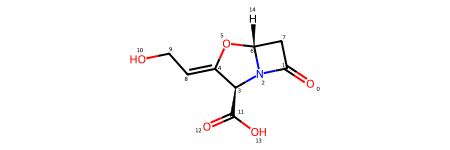

In [78]:
IPythonConsole.drawOptions.addAtomIndices = True
clavulanic_acid

## 2D visualization 

We often want to see more than just one molecule. We can do so using the `Draw` module's `MolsToGridImage()` function. 

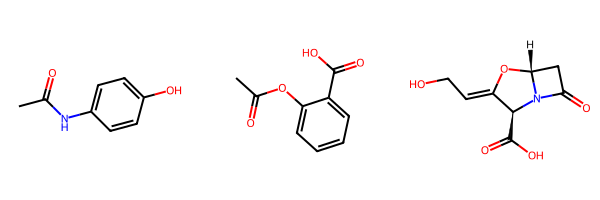

In [85]:
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = False

mols_list = [tylenol, aspirin, clavulanic_acid]
Draw.MolsToGridImage(mols_list, molsPerRow = 3)

## Descriptors 

Molecular descriptors are numerical representations of chemical structures and properties. They can come from the molecular formula, the molecule's size and shape, or even its electronic structure. The `Descriptors` module gives us many built-in tools to calculate descriptors. Let's try it out on Tylenol. 


In [ ]:
from rdkit.Chem import Descriptors

# Calculate different molecular descriptors
num_rotatable_bonds = Descriptors.NumRotatableBonds(tylenol)
num_h_donors = Descriptors.NumHDonors(tylenol)
num_h_acceptors = Descriptors.NumHAcceptors(tylenol)
mol_weight = Descriptors.MolWt(tylenol)
mol_logp = Descriptors.MolLogP(tylenol)
num_valence_electrons = Descriptors.NumValenceElectrons(tylenol)

# Print the results
print(f"Number of Rotatable Bonds: {num_rotatable_bonds}")
print(f"Number of Hydrogen Donors: {num_h_donors}")
print(f"Number of Hydrogen Acceptors: {num_h_acceptors}")
print(f"Molecular Weight: {mol_weight}")
print(f"LogP (Octanol-Water Partition Coefficient): {mol_logp}")
print(f"Number of Valence Electrons: {num_valence_electrons}")


Number of Rotatable Bonds: 1
Number of Hydrogen Donors: 2
Number of Hydrogen Acceptors: 2
Molecular Weight: 151.165
LogP (Octanol-Water Partition Coefficient): 1.3505999999999998
Number of Valence Electrons: 58


There are additional libraries useful for calculating descriptors, such as `mordred`. If you're interested, you can find more information at [their github](https://github.com/mordred-descriptor/mordred). 

## **Fingerprints** 

Fingerprints encode the structural characteristics of a molecule as a bit vector or a count vector. They enable us to do some very useful analysis, including **molecular similarity search**, **clustering**, and **machine learning**. 

RDKit has a consistent method of generating any kind of fingerprint. 

In [ ]:
from rdkit.Chem import rdFingerprintGenerator

# Morgan generator
morgan_generator = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

tylenol_morgan_bfp = morgan_generator.GetFingerprint(tylenol) # Bit vector
tylenol_morgan_cfp = morgan_generator.GetCountFingerprint(tylenol) # Count vector

Other kinds of fingerprints can be generated using their respective generator. See below for the RDKit, Atom Pairs, and Topological Torsions fingerprints.

In [113]:
rdkgen = rdFingerprintGenerator.GetRDKitFPGenerator(fpSize=2048)
apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=2048)
ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=2048)

### **Common Molecular Fingerprints in RDKit**  

**Morgan Fingerprint:** The Morgan fingerprint is a circular fingerprint, which means it captures the local environment around each atom up to a specified radius. It is also known as the Extended Connectivity Fingerprint (ECFP).

The algorithm works by:
1. Assigning an initial invariant value (e.g., atom type) to each atom
2. Iteratively updating each atom’s invariant by combining it with the invariants of its neighbors
3. At each iteration, the radius of the neighborhood considered is increased by one bond
4. The final invariants for each atom, after the specified radius is reached, are hashed to generate the fingerprint

In the usual version, which is the extended connectivity fingerprint, initial atom invariants are based on connectivity information (e.g., atomic number, number of connected atoms, etc.)
Morgan fingerprints are widely used due to their ability to capture structural information in a compact representation. They are well-suited for similarity searching and machine learning tasks.

**RDKit Fingerprint:** The RDKit fingerprint is a path-based fingerprint that enumerates all linear and branched subgraphs (paths) up to a specified maximum length. It is inspired by the Daylight fingerprint.

The algorithm works by:

1. Enumerating all linear and branched paths up to a maximum length (default is 7 bonds)
2. Optionally including bond orders, ring information, and hydrogen atoms
3. Hashing each path to generate the fingerprint
4. The RDKit fingerprint is a widely used and efficient fingerprint type in the RDKit. It is particularly useful for substructure searching and similarity calculations.

**Atom Pairs Fingerprint:** The Atom Pairs fingerprint is a topological fingerprint that captures information about the distances between pairs of atoms in a molecule.

The algorithm works by:

1. Enumerating all pairs of non-hydrogen atoms in the molecule
2. Computing the shortest path distance (number of bonds) between each pair
3. Hashing each (atom type, atom type, distance) tuple to generate the fingerprint
4. Atom Pairs fingerprints are particularly useful for capturing shape and topology information, making them suitable for applications such as virtual screening and similarity searching.

**Topological Torsion Fingerprint:** The Topological Torsion fingerprint is a variant of the Atom Pairs fingerprint that captures information about the angles (torsions) between pairs of atoms in a molecule.

The algorithm works by:

1. Enumerating all paths of length 4 (torsions) in the molecule
2. Optionally including bond orders and ring information
3. Hashing each (atom1, atom2, atom3, atom4) tuple to generate the fingerprint

Topological Torsion fingerprints are useful for capturing more detailed shape and topological information compared to Atom Pairs fingerprints, making them suitable for applications such as 3D similarity searching and conformer generation.

**Choosing the Right Fingerprint**  
All of these fingerprint types have their strengths and weaknesses, and the choice of which one to use depends on the specific application and the trade-off between computational cost, storage requirements, and the desired level of structural information capture.

You can customize the fingerprint parameters when creating the generator (e.g., radius, maxPath, useHs, etc.)For more details, check out the [RDKit documentation](https://www.rdkit.org/docs/GettingStartedInPython.html#fingerprints). Interested readers can also find out how to visualize these bits and what they actually mean on the molecule. Look for the section `Generating images of fingerprint bits`. 

## Fingerprints and molecular similarity

The Tanimoto similarity (aka Jaccard index) is often used to compare fingerprints. A tanimoto value of 0 means that the molecules have no bits in common, a tanimoto value of 1 means that all bits are shared. 

Let's use tanimoto similarity to compare tylenol, aspirin, and caffiene. 

In [ ]:
caffeine_smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
caffeine = Chem.MolFromSmiles(caffeine_smiles)

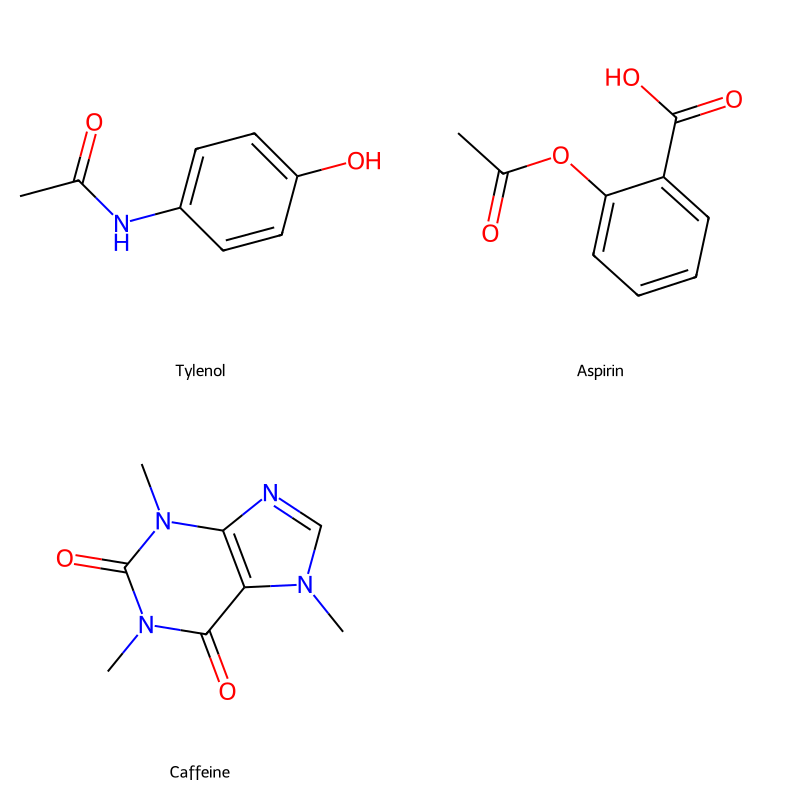

In [ ]:
from rdkit.Chem import Draw
Draw.MolsToGridImage([tylenol, aspirin, caffeine], molsPerRow=2, subImgSize=(400, 400), legends=["Tylenol", "Aspirin", "Caffeine"])

In [ ]:
from rdkit.Chem import DataStructs

aspirin_morgan_bfp = morgan_generator.GetFingerprint(aspirin)
caffeine_morgan_bfp = morgan_generator.GetFingerprint(caffeine)

# Calculate the Tanimoto similarity
aspirin_caffeine_similarity = DataStructs.TanimotoSimilarity(aspirin_morgan_bfp, caffeine_morgan_bfp)
aspirin_tylenol_similarity = DataStructs.TanimotoSimilarity(aspirin_morgan_bfp, tylenol_morgan_bfp)
tylenol_caffeine_similarity = DataStructs.TanimotoSimilarity(tylenol_morgan_bfp, caffeine_morgan_bfp)

print(f"Aspirin and Caffeine: {aspirin_caffeine_similarity:.2f}")
print(f"Aspirin and Tylenol: {aspirin_tylenol_similarity:.2f}")
print(f"Tylenol and Caffeine: {tylenol_caffeine_similarity:.2f}")

Aspirin and Caffeine: 0.09
Aspirin and Tylenol: 0.22
Tylenol and Caffeine: 0.10


We can see that (as we might expect), aspirin and tylenol are more similar than tylenol and caffine. Let's look at another example: 4-Fluorotoluene and 4-Chlorotoluene. Compute the tanimoto similarity between these molecules, and comment on the implications. 

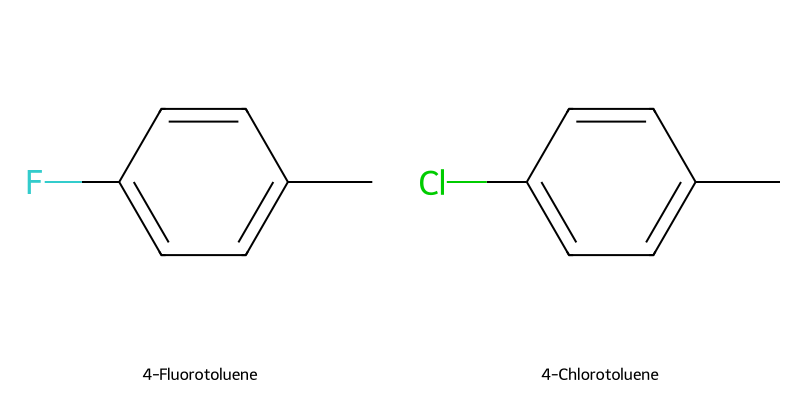

In [ ]:
fluorotoluene = Chem.MolFromSmiles("CC1=CC=C(F)C=C1")  # 4-Fluorotoluene
chlorotoluene = Chem.MolFromSmiles("CC1=CC=C(Cl)C=C1")  # 4-Chlorotoluene

Draw.MolsToGridImage([fluorotoluene, chlorotoluene], molsPerRow=2, subImgSize=(400, 400), legends=["4-Fluorotoluene", "4-Chlorotoluene"])

In [ ]:
fluoro_bfp = # Your code here
chloro_bfp = # Your code here

fluoro_chloro_similarity = # Your code here
print(f"4-Fluorotoluene and 4-Chlorotoluene: {fluoro_chloro_similarity:.2f}")

4-Fluorotoluene and 4-Chlorotoluene: 0.44


<details> <summary>Implications?</summary>
As chemists, we might say that these molecules are quite similar. The tanimoto similarity, however, does not reflect this. 

</details>

What about for the two enantiomers of Ibuprofen? 

In [ ]:
r_ibuprofen = Chem.MolFromSmiles("C[C@H](C1=CC=C(C=C1)CC(C)C)C(=O)O")
s_ibuprofen = Chem.MolFromSmiles("C[C@@H](C1=CC=C(C=C1)CC(C)C)C(=O)O")

# Your code here

R- and S-ibuprofen: 1.00


In order to capture chirality in the fingerprint, we need to specify that in the generator. 

In [ ]:
chiral_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048, includeChirality=True)

# Calculate fingerprints with chirality

# Calculate the Tanimoto similarity


R- and S-ibuprofen (chiral): 0.75


## Descriptors and Similarity Search of Drug Molecules

We are going to put together everything we've just learned (along with those `pandas` skills from Week 4) to walk through a simple cheminformatics task (your TAs can tell you that this looks a bit like projects we do). 

We are going to calculate some descriptors of drug molecules downloaded from the Chembl database (https://www.ebi.ac.uk/chembl/). Then, we'll use fingerprints to do a similarity search. 

Read in the database. How many entries are there? How many columns? What data does it contain? (Note that the dataset has the separator ";" instead of ",").

In [ ]:
import pandas as pd

drugs = # Your code here

Shape (14805, 29)
Columns Index(['Parent Molecule', 'Name', 'Synonyms', 'Research Codes', 'Phase',
       'Drug Applicants', 'USAN Stem', 'USAN Year', 'USAN Definition',
       'USAN Stem - Substem', 'First Approval', 'ATC Codes',
       'Level 4 ATC Codes', 'Level 3 ATC Codes', 'Level 2 ATC Codes',
       'Level 1 ATC Codes', 'Indication Class', 'Patent', 'Drug Type',
       'Passes Rule of Five', 'First In Class', 'Chirality', 'Prodrug', 'Oral',
       'Parenteral', 'Topical', 'Black Box', 'Availability Type', 'Smiles'],
      dtype='object')


Filter this database for molecules that have `Phase = 4` and have an entry in the `Smiles` column that is not null. 

In [ ]:
approved_drugs = # Your code here

A large part of any project is data cleaning. Any chemical dataset may contain salts, isotopes, solvents, tautomers, and inconsistent stereochemical information. There are advanced ways to deal with that (see [this package](https://molvs.readthedocs.io/en/latest/)). For now, let's drop all compounds that contain salts. Do this by removing molecules with a "." in the SMILES.  

In [ ]:
# Your code here

Let's take a look at our dataset. Although smiles are relatively human-readable, it would be nice to see the structure. We can use the PandasTools module to help. 

In [91]:
from rdkit.Chem import PandasTools

PandasTools.RenderImagesInAllDataFrames(images = True) # needed to render images if you run the cell multiple times

PandasTools.AddMoleculeColumnToFrame(approved_drugs, smilesCol = "Smiles", molCol = "RdkitMOL")

/Users/skopf/miniconda3/envs/ppchem/lib/python3.10/site-packages/rdkit/Chem/PandasPatcher.py:137: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,Parent Molecule,Name,Synonyms,Research Codes,Phase,Drug Applicants,USAN Stem,USAN Year,USAN Definition,USAN Stem - Substem,...,First In Class,Chirality,Prodrug,Oral,Parenteral,Topical,Black Box,Availability Type,Smiles,RdkitMOL
0,CHEMBL1868702,GESTRINONE,A 46 745|A-46-745|A-46745|DIMETRIOSE|GESTRINON...,A 46 745|A-46-745|A-46745|R 2323|R-2323|RU 232...,4.0,NaN,'-estr-; -rinone',1978.0,estrogens; cardiotonics (amrinone type),'-estr-(-estr-); -rinone(-rinone)',...,0,Single Stereoisomer,0,0,0,0,0,Unknown,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3C=...,
1,CHEMBL307145,PYROGALLOL,NSC-5035|PYROGALLIC ACID|PYROGALLOL,NSC-5035,4.0,NaN,NaN,NaN,NaN,NaN,...,0,Achiral Molecule,0,0,0,0,0,Unknown,Oc1cccc(O)c1O,

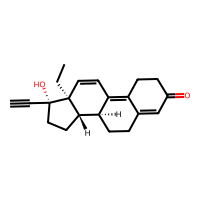
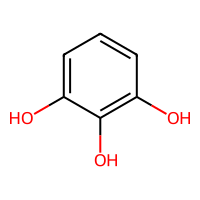

In [92]:
approved_drugs.head(2)

We can also do this by ourselves by adding a molecule column to the dataframe. 

/Users/skopf/miniconda3/envs/ppchem/lib/python3.10/site-packages/rdkit/Chem/PandasPatcher.py:137: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,Parent Molecule,Name,Synonyms,Research Codes,Phase,Drug Applicants,USAN Stem,USAN Year,USAN Definition,USAN Stem - Substem,...,Chirality,Prodrug,Oral,Parenteral,Topical,Black Box,Availability Type,Smiles,RdkitMOL,My_Mol
0,CHEMBL1868702,GESTRINONE,A 46 745|A-46-745|A-46745|DIMETRIOSE|GESTRINON...,A 46 745|A-46-745|A-46745|R 2323|R-2323|RU 232...,4.0,NaN,'-estr-; -rinone',1978.0,estrogens; cardiotonics (amrinone type),'-estr-(-estr-); -rinone(-rinone)',...,Single Stereoisomer,0,0,0,0,0,Unknown,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3C=...,,
1,CHEMBL307145,PYROGALLOL,NSC-5035|PYROGALLIC ACID|PYROGALLOL,NSC-5035,4.0,NaN,NaN,NaN,NaN,NaN,...,Achiral Molecule,0,0,0,0,0,Unknown,Oc1cccc(O)c1O,,

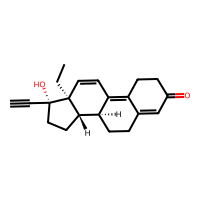
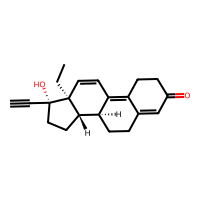
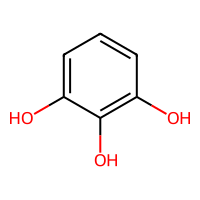
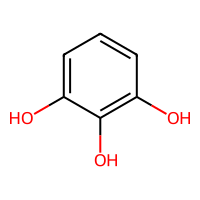

In [93]:
approved_drugs["My_Mol"] = approved_drugs["Smiles"].apply(Chem.MolFromSmiles)
approved_drugs.head(2)

Note that we are storing rdkit mol objects, which are rendered into images when displayed. 

Number of atoms:  23


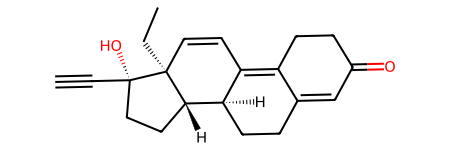

In [94]:
print("Number of atoms: ", approved_drugs["My_Mol"].iloc[0].GetNumAtoms())
approved_drugs["My_Mol"].iloc[0]

If we have many many molecules, it may not make sense to store that many Mol objects in memory. Instead, we may want to perform a task on the fly, getting the data we need without keeping all of those mol objects. 

In [95]:
# Use stored Mol objects 
approved_drugs["n_atoms"] = approved_drugs["My_Mol"].apply(lambda x: x.GetNumAtoms())

# Use smiles directly, wihtout storing Mol Objects
approved_drugs["n_atoms_from_smiles"] = approved_drugs["Smiles"].apply(lambda x: Chem.MolFromSmiles(x).GetNumAtoms())

## **Calculate Descriptors**
Use the Descriptors module in rdkit that you learned about in the lecture to calculate some properties of these molecules. Specifically, use the on-the-fly method to create new columns in the dataframe for `NumRotatableBonds`, `NumHDonors`, `NumHAcceptors`, `MolWt`, the `MolLogP` and `NumValenceElectrons`. 

In [ ]:
from rdkit.Chem import Descriptors
approved_drugs["NumRotatableBonds"] = # Your code here
# Your code here

Write a function to count the number of F, Cl, Br, or I atoms in a molecule. Use this function to add a column in the dataframe. 

In [ ]:
def count_halides(smiles: str) -> int:
    # Your code here

In [ ]:
approved_drugs["nX"] = # Your code here

Make a histogram of the number of halogens that appear in drugs. 

Text(0.5, 1.0, 'Distribution of Halogens in Approved Drugs')

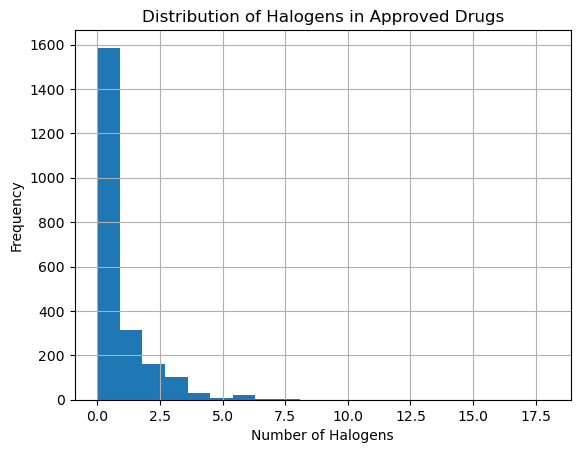

In [ ]:
import matplotlib.pyplot as plt
# Your code here
plt.xlabel("Number of Halogens")
plt.ylabel("Frequency")
plt.title("Distribution of Halogens in Approved Drugs")

 Draw the top 10 molecules with the most halogens and label with their names and the number of halogens they contain. 

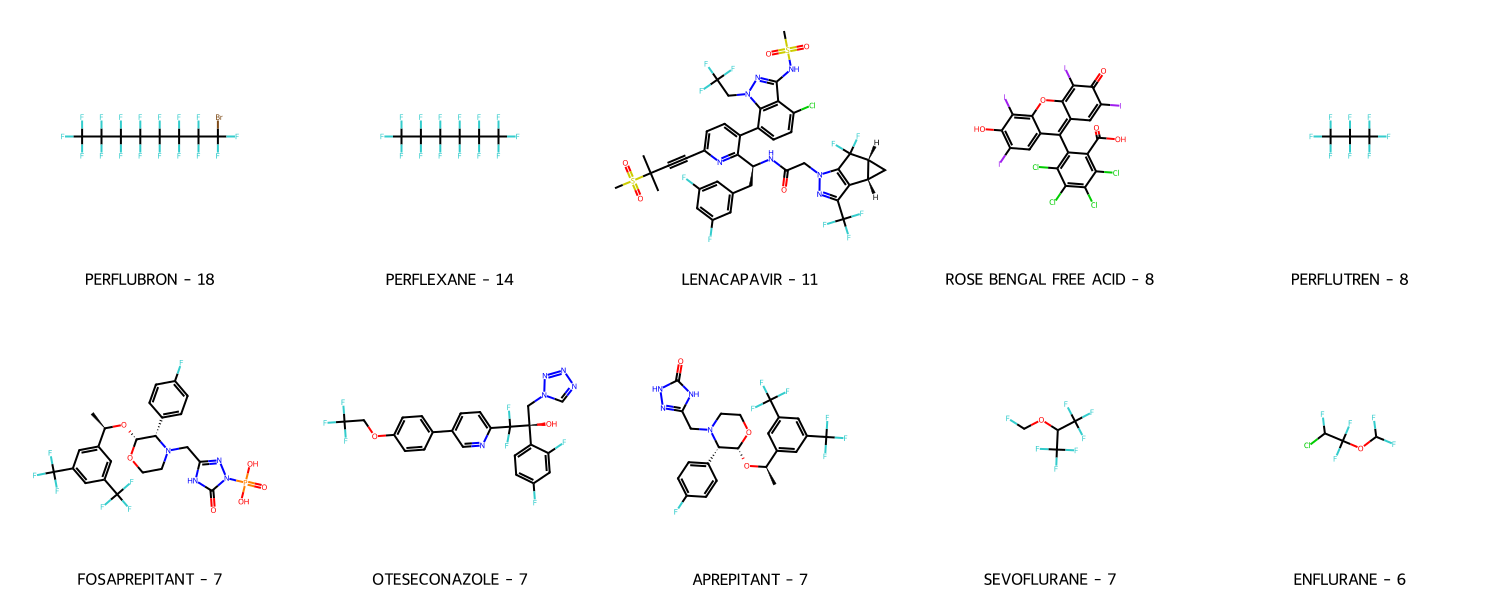

In [ ]:
from rdkit.Chem import Draw
top_10 = # Your code here

Use morgan fingerprints to find the compound in this database most similar to tylenol. 

/Users/skopf/miniconda3/envs/ppchem/lib/python3.10/site-packages/rdkit/Chem/PandasPatcher.py:137: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,Name,My_Mol,similarity_to_tylenol
865,ACETAMINOPHEN,,1.000000
512,PHENACETIN,,0.533333
278,BENORILATE,,0.410256
1314,PRACTOLOL,,0.400000
269,HYDROQUINONE,,0.400000

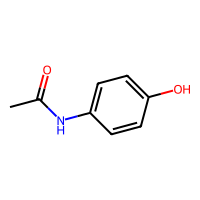
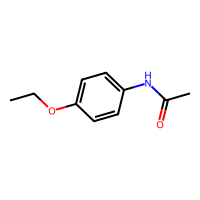
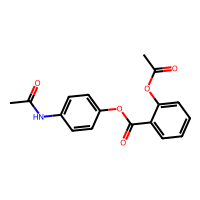
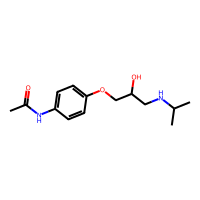
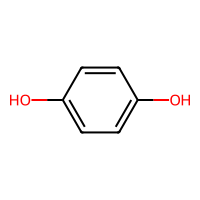

In [ ]:
# Find fingerprints of all compounds


# Compute bulk similarity to tylenol's fingerprint


# Get top 5 most similar compounds


Great! Our most similar molecule is actually tylenol (also called acetaminophen). The rest of the molecules also feature an amide, a phenyl ring, or an alcohol. Do we get similar results when we instead use the topological torsion fingerprint? Comment on what you find. 

/Users/skopf/miniconda3/envs/ppchem/lib/python3.10/site-packages/rdkit/Chem/PandasPatcher.py:137: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,Name,My_Mol,TT_similarity
865,ACETAMINOPHEN,,1.000000
512,PHENACETIN,,0.611111
269,HYDROQUINONE,,0.500000
221,HYDROXYAMPHETAMINE,,0.444444
1314,PRACTOLOL,,0.440000

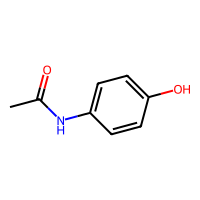
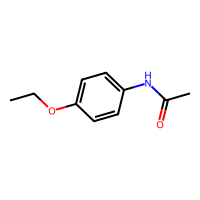
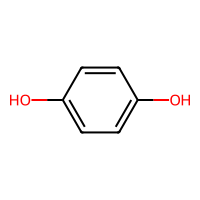
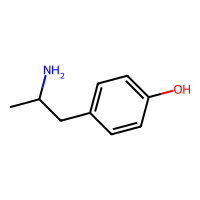
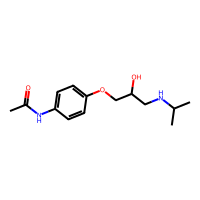

In [ ]:
# Find fingerprints of all compounds with the TT generator


# Get top 5 most similar compounds


Similarity search is indeed sensitive to fingerprint choice. Pick yours depending on your specific application! 

### Challenge problem: 

You can change the highlight color on atoms! To do so, set the `highlightAtomColors` parameter within the `Draw.MolsToGridImage()` to a dictionary with the form {atom_index: color}, where color is a tuple of three numbers between 0 and 1 (e.g. (0.3, 0.3, 0.1))

Draw the top 10 molecules with the most halogens, but highlight each halogen in a different color. 

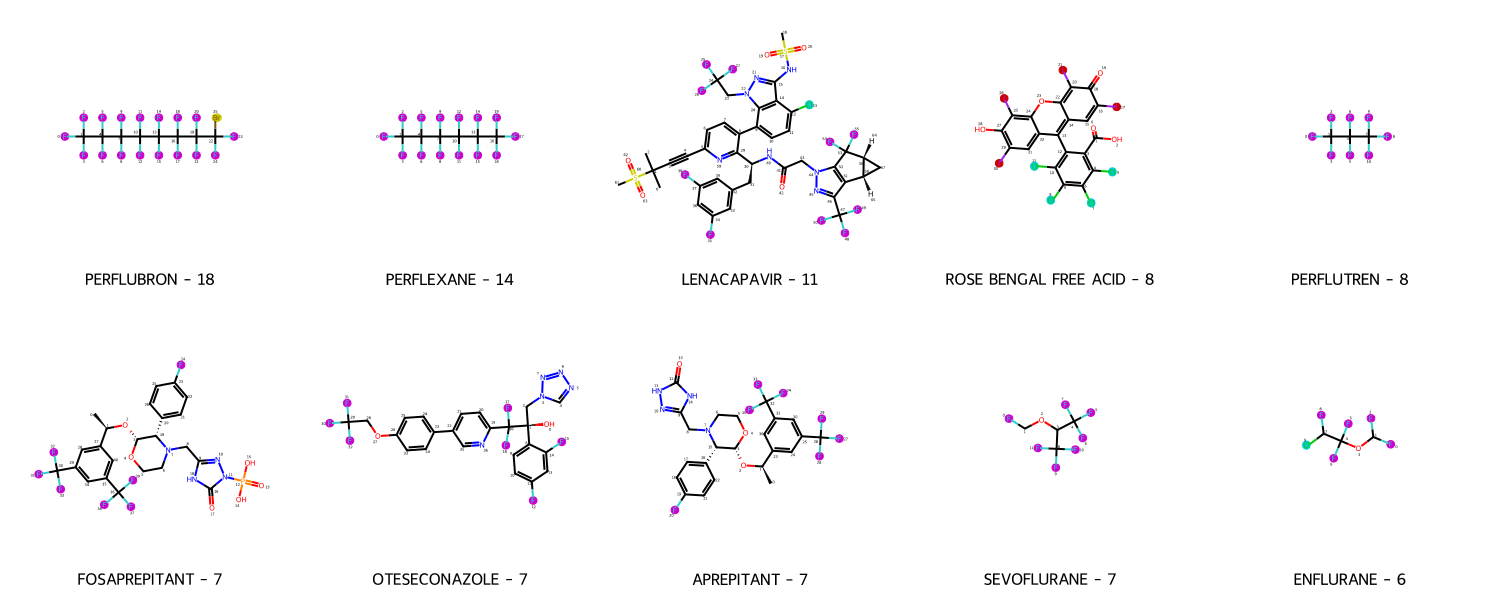

In [ ]:
# highlight each halogen
